### Project Development

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("saved_model\dataset\Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### **1. Handle Missing Values**

In [3]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


#### Remove Duplicate

In [5]:
data.duplicated().sum()

0

#### if duplicates are present 
##### data.drop_duplicate(inplace=True)

In [6]:
#remove unwanted columns
data.drop(labels=['RowNumber','CustomerId','Surname'],axis=1,inplace=True)
data.head()
      

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
categorical_cols=data.select_dtypes(include='object').columns
numerical_cols=data.select_dtypes(exclude='object').columns

print(categorical_cols)
print("\n")
print(numerical_cols)

Index(['Geography', 'Gender'], dtype='object')


Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


In [8]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
data.Gender.unique()


array(['Female', 'Male'], dtype=object)

In [10]:
data.Gender.value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

#correlation==> heatmap

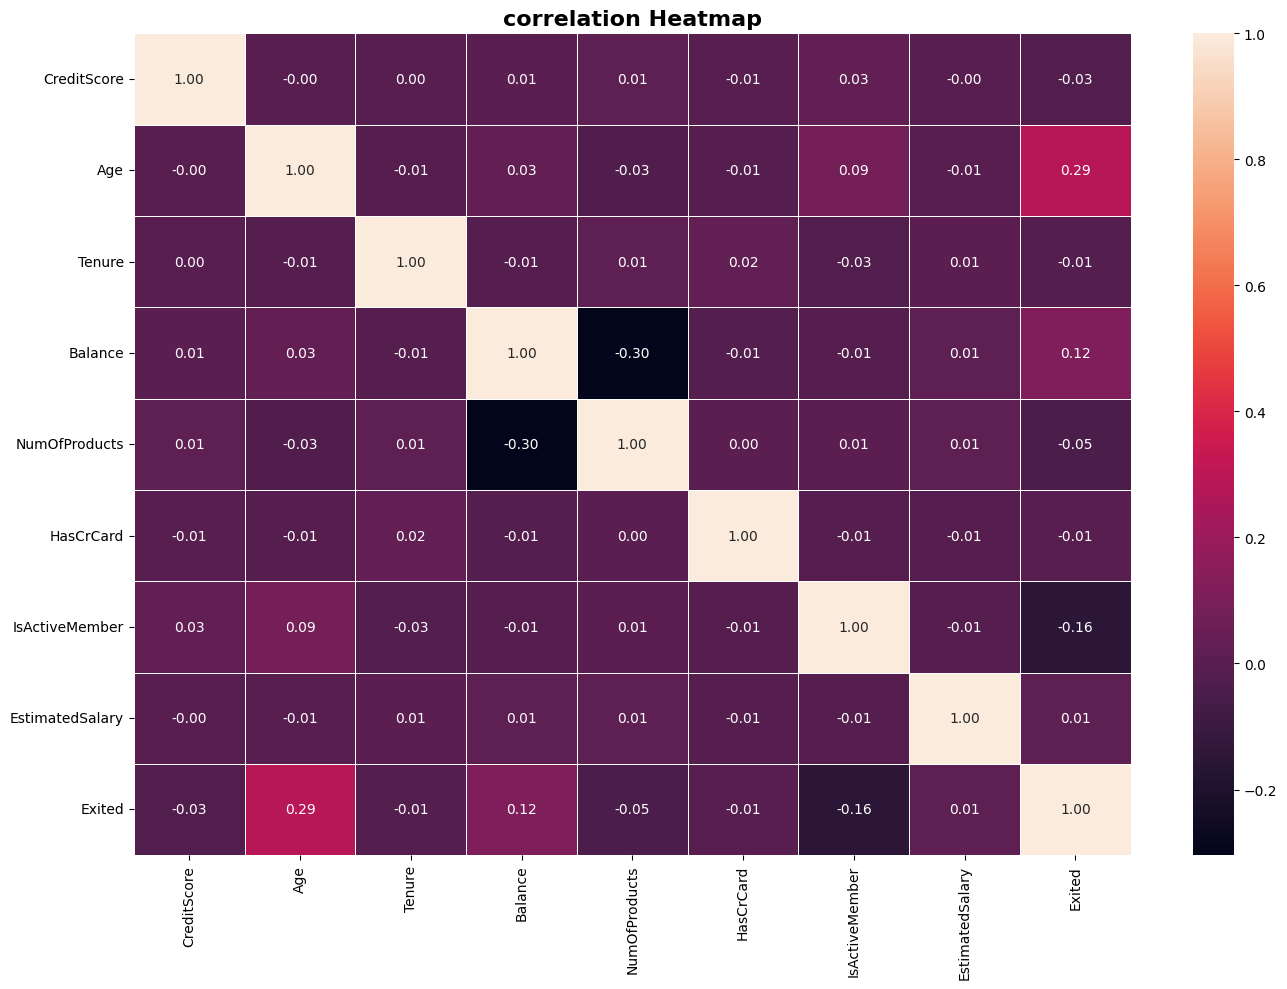

In [11]:
plt.figure(figsize=(14,10))
corr_matrix=data[numerical_cols].corr()

sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    linewidths=0.5
)
plt.title("correlation Heatmap",fontsize=16,fontweight="bold")
plt.tight_layout()
plt.show()

In [12]:
X=data.drop("Exited",axis=1)
Y=data["Exited"]

In [13]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [14]:
categorical_cols=X.select_dtypes(include='object').columns
numerical_cols=X.select_dtypes(exclude='object').columns

print(categorical_cols)
print("\n")
print(numerical_cols)

Index(['Geography', 'Gender'], dtype='object')


Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')


In [15]:
# converting categorical data into neumerical
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
#pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [16]:
gender_cat=['Female','Male']
geo_cat=['France','Spain','Germany']

In [17]:
# Match the order: geo_cat first because 'Geography' appears before 'Gender' in categorical_cols
cat_pipeline = Pipeline(steps=[
    ('ordinalencoder', OrdinalEncoder(categories=[geo_cat, gender_cat]))
])

num_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    [
        ("num_pipeline", num_pipeline, numerical_cols),
        ("cat_pipeline", cat_pipeline, categorical_cols)
    ]
)

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test =train_test_split(
    X,Y,test_size=0.2,random_state=42
)

In [19]:
# Applying the preprocessing pipelines to the training and testing data
X_train = pd.DataFrame(preprocessor.fit_transform(X_train), columns= preprocessor.get_feature_names_out())
X_test = pd.DataFrame(preprocessor.transform(X_test), columns= preprocessor.get_feature_names_out())

In [20]:
X_train.head()

,num_pipeline__CreditScore,num_pipeline__Age,num_pipeline__Tenure,num_pipeline__Balance,num_pipeline__NumOfProducts,num_pipeline__HasCrCard,num_pipeline__IsActiveMember,num_pipeline__EstimatedSalary,cat_pipeline__Geography,cat_pipeline__Gender
0,0.356500,-0.655786,0.345680,-1.218471,0.808436,0.649203,0.974817,1.367670,0.0,1.0
1,-0.203898,0.294938,-0.348369,0.696838,0.808436,0.649203,0.974817,1.661254,2.0,1.0
2,-0.961472,-1.416365,-0.695393,0.618629,-0.916688,0.649203,-1.025834,-0.252807,1.0,1.0
3,-0.940717,-1.131148,1.386753,0.953212,-0.916688,0.649203,-1.025834,0.915393,0.0,0.0
4,-1.397337,1.625953,1.386753,1.057449,-0.916688,-1.540351,-1.025834,-1.059600,0.0,1.0


#### **Feature Engineering**

In [21]:
import pickle
with open("saved_model/preprocessor.pkl","wb") as f:
    pickle.dump(preprocessor,f)

#### ANN IMPLEMENTATION

In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard
import datetime

In [23]:
X_train.shape[1],

(10,)

In [24]:
model=Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32,activation='relu'),
    Dense(1,activation='sigmoid')
])


In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                704       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2817 (11.00 KB)
Trainable params: 2817 (11.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.001)

In [27]:
model.compile(optimizer=opt,
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [28]:
log_dir="logs/"+datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorflow_callback=TensorBoard(log_dir=log_dir,histogram_freq=1)

## Earlystopping

In [29]:
early_stopping_callback=EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True
)

In [30]:
history = model.fit(
    X_train,Y_train,
    validation_data = (X_test,Y_test),
    epochs= 100,
    callbacks=[tensorflow_callback,early_stopping_callback]
)

Epoch 1/100


250/250 [==============================] - 4s 6ms/step - loss: 0.4582 - accuracy: 0.8051 - val_loss: 0.3728 - val_accuracy: 0.8465
Epoch 2/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3694 - accuracy: 0.8493 - val_loss: 0.3487 - val_accuracy: 0.8555
Epoch 3/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3516 - accuracy: 0.8562 - val_loss: 0.3549 - val_accuracy: 0.8575
Epoch 4/100
250/250 [==============================] - 1s 5ms/step - loss: 0.3471 - accuracy: 0.8575 - val_loss: 0.3470 - val_accuracy: 0.8570
Epoch 5/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3412 - accuracy: 0.8560 - val_loss: 0.3411 - val_accuracy: 0.8595
Epoch 6/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3382 - accuracy: 0.8602 - val_loss: 0.3429 - val_accuracy: 0.8585
Epoch 7/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3358 - accuracy: 0.8609 - val_loss: 0.3380 - val_accuracy: 0.86

In [31]:
model.save("saved_model/model.h5")

c:\Users\Arnab Kumar Jana\.conda\envs\venv2\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [32]:
loss=history.history['loss']
acc=history.history['accuracy']
val_loss=history.history['val_loss']
val_acc=history.history['val_accuracy']

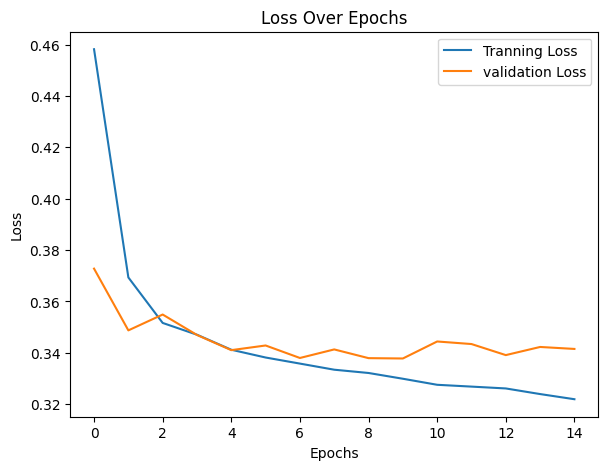

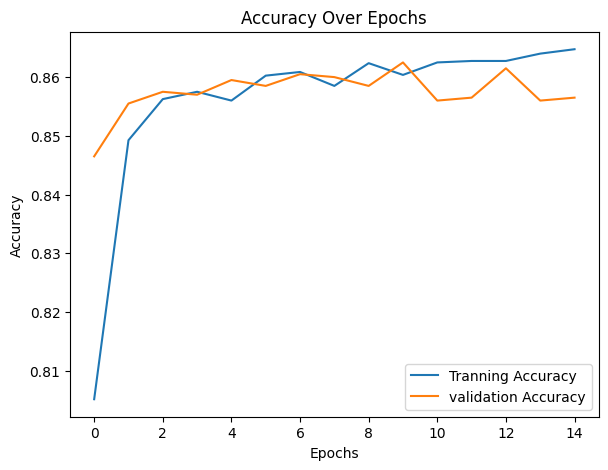

In [33]:
epochs=len(acc)
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(loss,label='Tranning Loss')
plt.plot(val_loss,label='validation Loss')
plt.title("Loss Over Epochs")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


plt.figure(figsize=(15,5))
plt.subplot(1,2,2)
plt.plot(acc,label='Tranning Accuracy')
plt.plot(val_acc,label='validation Accuracy')
plt.title("Accuracy Over Epochs")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



In [34]:
###Load Tensorboard
%load_ext tensorboard

In [35]:
%tensorboard --logdir logs/

Reusing TensorBoard on port 6006 (pid 13820), started 4 days, 0:07:27 ago. (Use '!kill 13820' to kill it.)